In [1]:
import pandas as pd
from plot_utils import NC_across_ROIs, heatmap
from resources import rois_func_lang_md_dmn, lang_LH_rois

## Settings

In [2]:
fname = '../../data/brain-lang-data_participant_20230728.csv'
df = pd.read_csv(fname)

save = False
PLOTDIR = None # Where to store plots
CSVDIR = None # Where to store accompanying CSV files

## Figure 4A

In [3]:
# Plot NC 
fname_nc = '/Users/gt/Documents/GitHub/beta-neural-control/data_packaging_visualization/csvs/compute_NSD_noiseceiling/NC_rois_20221214a_gs_848-853-865-875-876_pcstop-5_fracs-0.05_norm-bySessVoxZ_n-rois-488_NC_n-5_with-split-half_TESTPUBLIC.csv'
df_nc = pd.read_csv(fname_nc, index_col=0)

rois_not_in_nc: ['md_LH_midFrontalOrb']


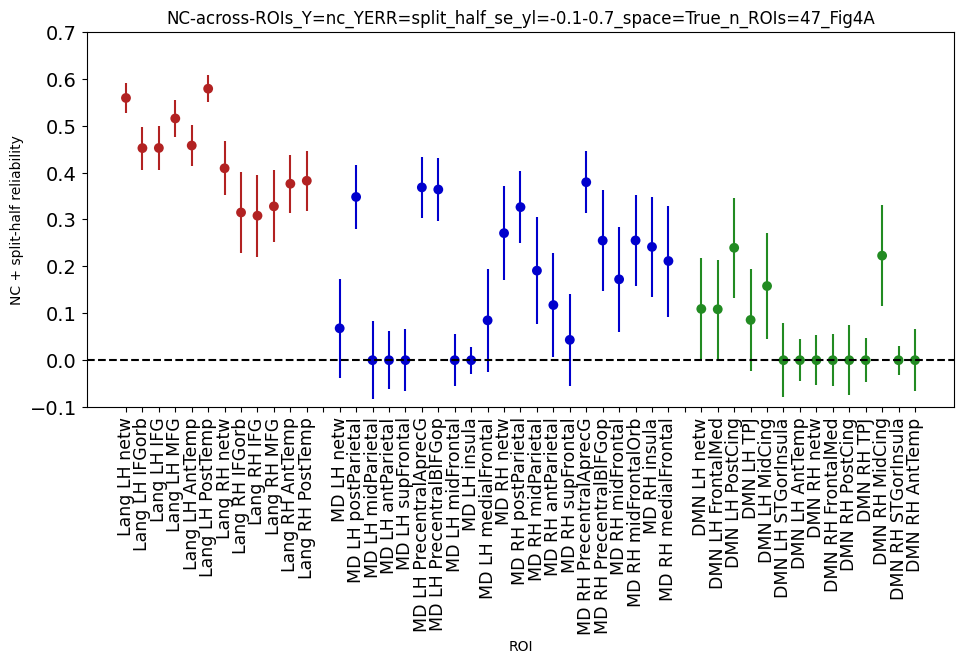

NC across ROIs: [0.55915458 0.45220189 0.45248414 0.5154454  0.45771223 0.57890406
 0.40921438 0.31497533 0.30810699 0.3280156  0.37622045 0.38256817
 0.06800763 0.34807522 0.         0.         0.         0.36845262
 0.36391971 0.         0.         0.0849731  0.27089267 0.32639265
 0.19093329 0.11759334 0.04333659 0.37947683 0.25506159 0.17244053
 0.25532993 0.24157492 0.21145663 0.10936994 0.10857124 0.23965347
 0.08579923 0.15814924 0.         0.         0.         0.
 0.         0.         0.22293905 0.         0.        ]


In [4]:
NC_across_ROIs(df=df_nc,
               rois=rois_func_lang_md_dmn,
               nc_col='nc',
               nc_err_col='split_half_se',
               save=save,
               ylim=[-0.1, 0.7],
               base_savestr='Fig4A',
               PLOTDIR=PLOTDIR, CSVDIR=CSVDIR
               )

## Figure 4B

In [5]:
# Query the train participants: 848, 853, 865, 875, 876
df_train = df.query('target_UID in [848, 853, 865, 875, 876]')

# Average over participants such that we get one response per sentence per ROI
df_train_mean = df_train.groupby(['item_id', 'roi']).mean().reset_index()

# Generate a pivot table of item x ROI
df_train_piv = df_train_mean.pivot(index='item_id', columns='roi', values='response_target')

# Reorder the ROI columns
df_train_piv = df_train_piv[lang_LH_rois]

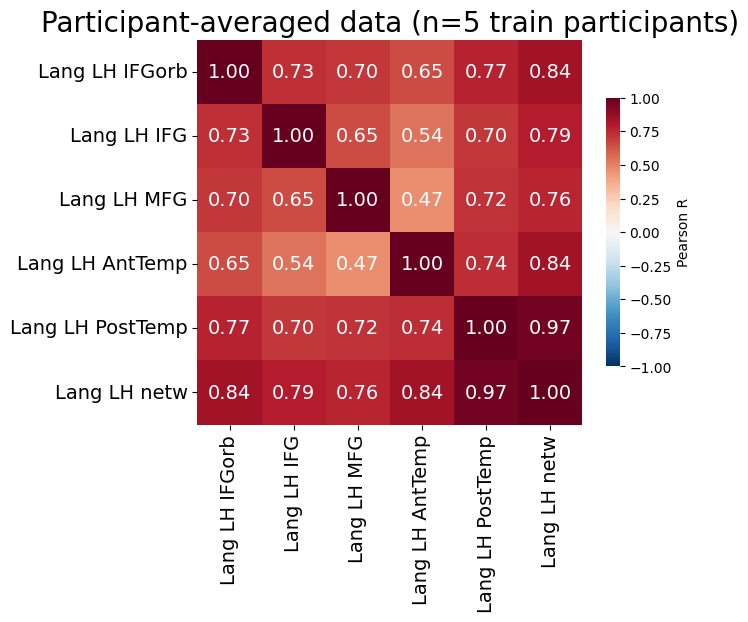

In [6]:
heatmap(df_corr=df_train_piv.corr(),
		figsize=(7,7),
		vmax=1, vmin=-1,
		center=0,
		annot=True,
		title=f'Participant-averaged data (n=5 train participants)',
		pretty_roi_labels=True,
		save=save,
		savestr='Fig4B',
		PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
		)

## Figure 4C 

In [10]:
# Query the evaluation search participants: 797, 841, 880
df_eval = df.query('target_UID in [797, 841, 880]')

# Average over participants such that we get one response per sentence per ROI
df_eval_mean = df_eval.groupby(['item_id', 'roi']).mean().reset_index()

# Generate a pivot table of item x ROI
df_eval_piv = df_eval_mean.pivot(index='item_id', columns='roi', values='response_target')

# Reorder the ROI columns
df_eval_piv = df_eval_piv[lang_LH_rois]

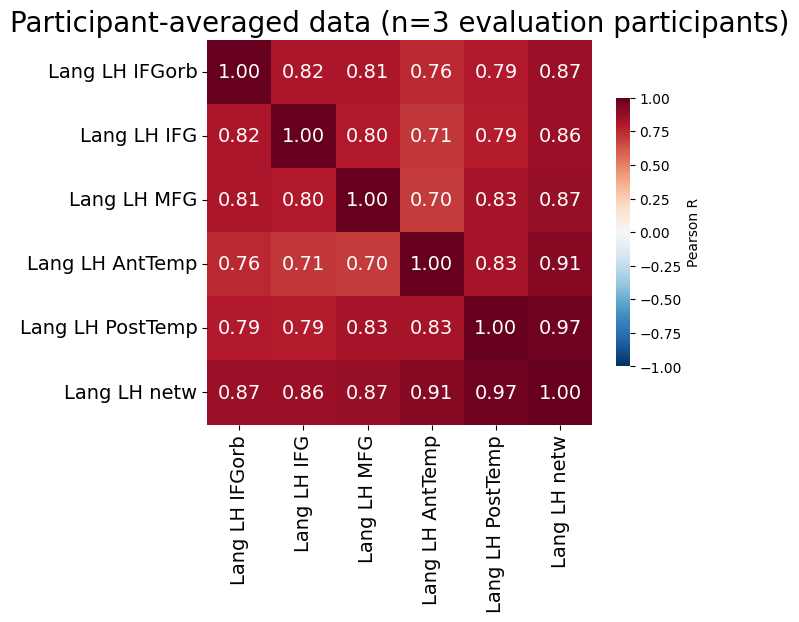

In [11]:
heatmap(df_corr=df_eval_piv.corr(),
		figsize=(7,7),
		vmax=1, vmin=-1,
		center=0,
		annot=True,
		title=f'Participant-averaged data (n=3 evaluation participants)',
		pretty_roi_labels=True,
		save=save,
		savestr='Fig4C',
		PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
		)